In [38]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from pltlatexify import latexify, format_axes

In [39]:
df = pd.read_csv('wandb_export/wandb_export_2022-03-19T20_25_34.798+01_00.csv')

In [40]:
df

,Name,_wandb,val/text_to_image_R@10,val/image_to_text_R@10
0,BERT_chunked_meanpooler_prepro,NaN,0.342769,0.339676
1,BERT_chunked_meanpooler,NaN,0.308991,0.313035
2,BERT_chunked_prepro,NaN,0.229068,0.226451
3,BERT_meanpooler_prepro,NaN,0.222407,0.218126
4,BERT_meanpooler,NaN,0.217412,0.222883
5,BERT_chunked,NaN,0.171741,0.184348
6,BERT_chunked_pooler_prepro,NaN,0.107755,0.117745
7,BERT_prepro,NaN,0.091817,0.096337
8,BERT,NaN,0.085395,0.093720
9,BERT_chunked_pooler,NaN,0.082065,0.086108


In [41]:
df.drop(columns=['_wandb'], inplace=True)

In [42]:
df.columns

Index(['Name', 'val/text_to_image_R@10', 'val/image_to_text_R@10'], dtype='object')

In [43]:
df['metric'] = (df['val/image_to_text_R@10'] + df['val/text_to_image_R@10'])/2

In [44]:
df.drop(columns=['val/image_to_text_R@10', 'val/text_to_image_R@10'], inplace=True)

In [45]:
df

,Name,metric
0,BERT_chunked_meanpooler_prepro,0.341223
1,BERT_chunked_meanpooler,0.311013
2,BERT_chunked_prepro,0.227759
3,BERT_meanpooler_prepro,0.220266
4,BERT_meanpooler,0.220147
5,BERT_chunked,0.178045
6,BERT_chunked_pooler_prepro,0.112750
7,BERT_prepro,0.094077
8,BERT,0.089558
9,BERT_chunked_pooler,0.084087


In [46]:
# clean up the labels a bit

translate_dict = {'BERT' :  '',
                  'chunked': 'Chunking',
                  'meanpooler': 'Mean Pooling',
                  'prepro': 'Pre-processing',
                  'pooler': '[POOLER_OUTPUT]',
                  'CLS': '[CLS]'
                 }

def rewrite_labels(label):
    newlabel = label.split('_')
    if 'pooler' not in newlabel:
        newlabel.append('CLS')
    if 'pooler' in newlabel:
        # append pooler always in the end of the label
        newlabel.remove('pooler')
        newlabel.append('pooler')
    newlabel = [translate_dict[s] for s in newlabel if translate_dict[s] != '']
    newlabel = '+'.join(newlabel)
    if newlabel == '[CLS]':
        newlabel = '[CLS] (default)'
    return newlabel

In [47]:
df['Name'] = df['Name'].apply(rewrite_labels)

In [48]:
df

,Name,metric
0,Chunking+Mean Pooling+Pre-processing+[CLS],0.341223
1,Chunking+Mean Pooling+[CLS],0.311013
2,Chunking+Pre-processing+[CLS],0.227759
3,Mean Pooling+Pre-processing+[CLS],0.220266
4,Mean Pooling+[CLS],0.220147
5,Chunking+[CLS],0.178045
6,Chunking+Pre-processing+[POOLER_OUTPUT],0.112750
7,Pre-processing+[CLS],0.094077
8,[CLS] (default),0.089558
9,Chunking+[POOLER_OUTPUT],0.084087


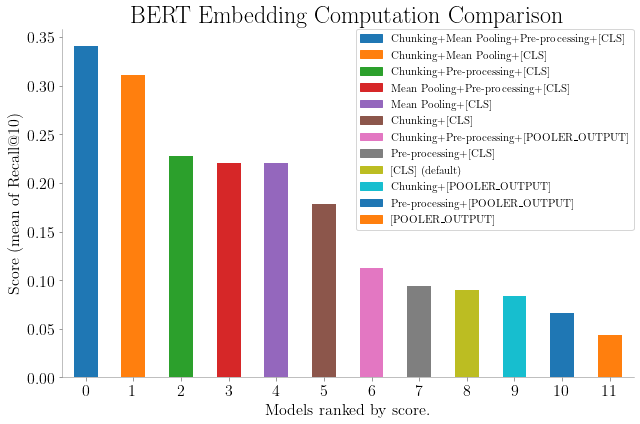

In [49]:
latexify(fig_width=9, fig_height=6, font_size=10, label_size=16, title_size=24, legend_size=11)

# plt styling parameters
# plt.style.use('seaborn')
# plt.rcParams['figure.figsize'] = (6.0, 4.0)
# plt.rcParams["patch.force_edgecolor"] = True

colors=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11']
# chose a color map with enough colors for the number of bars
# colors = [plt.cm.tab20c(np.arange(len(df)))]

# ax = df.plot(kind='bar', y='metric', title='Embeddings compared', figsize=(9,6), color=colors)
ax = df.plot(kind='bar', y='metric', title='Embeddings compared', color=colors)

#x = df.plot.bar(color=colors)
# plt.xticks(np.arange(len(df.Name)), list(df.Name), rotation=90)
plt.xticks(rotation=0)
#ax.get_legend().remove()
x_legend = '\n'.join(f'{n} - {Name}' for n,Name in zip(df.index,df['Name']))
#t = ax.text(.7,.2,x_legend,transform=ax.figure.transFigure)
# add the legend
# create the rectangles for the legend
# create color map with colors and df.names
cmap = dict(zip(df.Name, colors))
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
#plt.legend(handles=patches, bbox_to_anchor=(0.6, 0.8), loc='center left', borderaxespad=0)
plt.legend(handles=patches, loc='upper right', borderaxespad=0)
#fig.subplots_adjust(right=.65)
ax.set_xlabel("Models ranked by score.")
ax.set_ylabel("Score (mean of Recall@10)")
ax.set_title("BERT Embedding Computation Comparison")
plt.tight_layout()
format_axes(ax)
plt.savefig("plots/emb_models_compared.pdf")

In [50]:
df = pd.read_csv('wandb_export/wandb_export_2022-03-21T11_58_34.256+01_00.csv', usecols=['Name', 'val/text_to_image_R@1', 'val/text_to_image_R@5', 'val/text_to_image_R@10'])
df

,Name,val/text_to_image_R@1,val/text_to_image_R@10,val/text_to_image_R@5
0,SentVec default,0.259039,0.668173,0.535918
1,GPT-2 chunked meanpooler prepro2,0.165081,0.517602,0.390580
2,SentenceTransformer chunked prepro,0.128687,0.446717,0.330162
3,CliBERT_2m_chunked_meanpooler_prepro,0.124643,0.439819,0.316127
4,BioBERT_chunked_meanpooler_prepro,0.102521,0.413654,0.293530
5,PubMedBERT_chunked_meanpooler_prepro,0.097526,0.383682,0.272598
6,RoBERTa_chunked_meanpooler_prepro,0.093720,0.375357,0.260466
7,BERT_chunked_meanpooler_prepro,0.084443,0.342769,0.239058
8,Doc2Vec prepro,0.072074,0.307326,0.218126
9,BioELECTRA_chunked_meanpooler_prepro,0.013559,0.090866,0.051618


In [51]:
# wandb_export_2022-03-21T11_58_34.256+01_00.csv
df = pd.read_csv('wandb_export/wandb_export_2022-05-17T18_28_47.568+02_00.csv',
                 usecols=['Name', 'val/text_to_image_R@1', 'val/text_to_image_R@5', 'val/text_to_image_R@10',
                         'val/image_to_text_R@1', 'val/image_to_text_R@5', 'val/image_to_text_R@10'])

df['R@10'] = (df['val/image_to_text_R@10'] + df['val/text_to_image_R@10'])/2
df['R@5'] = (df['val/image_to_text_R@5'] + df['val/text_to_image_R@5'])/2
df['R@1'] = (df['val/image_to_text_R@1'] + df['val/text_to_image_R@1'])/2

df = df[['Name', 'R@1', 'R@5', 'R@10']]
df.columns = ['model', 'R@1', 'R@5', 'R@10']

# remove atributes
#df['model'] = df['model'].str.split(pat='_', n=1, expand=False).str[0]
#df['model'] = df['model'].str.split(pat=' ', n=1, expand=False).str[0]

# replace wrong values with the correct ones
df.loc[df['model'] == 'SentenceTransformer', 'model'] = 'SentenceTransformers'
df.loc[df['model'] == 'CliBERT', 'model'] = 'ClinicalBERT'

df

,model,R@1,R@5,R@10
0,BioSentVec,0.252854,0.531637,0.661394
1,BioSentVec Ablation: chart events & discharge ...,0.187797,0.428520,0.550071
2,GPT-2,0.163297,0.392245,0.516413
3,SentenceTransformers,0.131779,0.328616,0.441960
4,ClinicalBERT,0.122146,0.315176,0.438749
5,"BioSentVec Ablation: no chart events, non-disc...",0.154971,0.333492,0.416984
6,BioBERT,0.105614,0.295195,0.409729
7,PubMedBERT,0.099905,0.275214,0.383325
8,RoBERTa,0.093958,0.263559,0.374049
9,BERT (baseline),0.087060,0.240604,0.342293


In [52]:
print(df.sort_values(by='R@10', ascending=False).to_latex())

\begin{tabular}{llrrr}
\toprule
{} &                                              model &       R@1 &       R@5 &      R@10 \\
\midrule
0  &                                         BioSentVec &  0.252854 &  0.531637 &  0.661394 \\
1  &  BioSentVec Ablation: chart events \& discharge ... &  0.187797 &  0.428520 &  0.550071 \\
2  &                                              GPT-2 &  0.163297 &  0.392245 &  0.516413 \\
3  &                               SentenceTransformers &  0.131779 &  0.328616 &  0.441960 \\
4  &                                       ClinicalBERT &  0.122146 &  0.315176 &  0.438749 \\
5  &  BioSentVec Ablation: no chart events, non-disc... &  0.154971 &  0.333492 &  0.416984 \\
6  &                                            BioBERT &  0.105614 &  0.295195 &  0.409729 \\
7  &                                         PubMedBERT &  0.099905 &  0.275214 &  0.383325 \\
8  &                                            RoBERTa &  0.093958 &  0.263559 &  0.374049 \\
9  &    

In [53]:
print(df.sort_values(by='R@10', ascending=False).to_markdown())

|    | model                                                                  |        R@1 |        R@5 |       R@10 |
|---:|:-----------------------------------------------------------------------|-----------:|-----------:|-----------:|
|  0 | BioSentVec                                                             | 0.252854   | 0.531637   | 0.661394   |
|  1 | BioSentVec Ablation: chart events & discharge notes                    | 0.187797   | 0.42852    | 0.550071   |
|  2 | GPT-2                                                                  | 0.163297   | 0.392245   | 0.516413   |
|  3 | SentenceTransformers                                                   | 0.131779   | 0.328616   | 0.44196    |
|  4 | ClinicalBERT                                                           | 0.122146   | 0.315176   | 0.438749   |
|  5 | BioSentVec Ablation: no chart events, non-discharge vs discharge notes | 0.154971   | 0.333492   | 0.416984   |
|  6 | BioBERT                                  

In [54]:
# df.drop(df['model'].str.contains('Mel'))

df = df[~df['model'].str.contains('Ablation')]

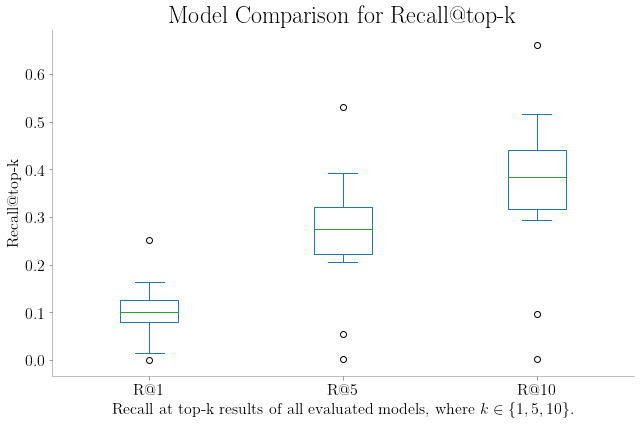

In [55]:
latexify(fig_width=9, fig_height=6, font_size=10, label_size=16, title_size=24, legend_size=11)
ax = df.plot(kind='box', figsize=(9,6))
# ax.get_legend().remove()
ax.set_xlabel("Recall at top-k results of all evaluated models, where $k \in \{1,5,10\}.$")
ax.set_ylabel("Recall@top-k")
ax.set_title("Model Comparison for Recall@top-k")
plt.tight_layout()
format_axes(ax)
plt.savefig("plots/topk_compared.pdf")

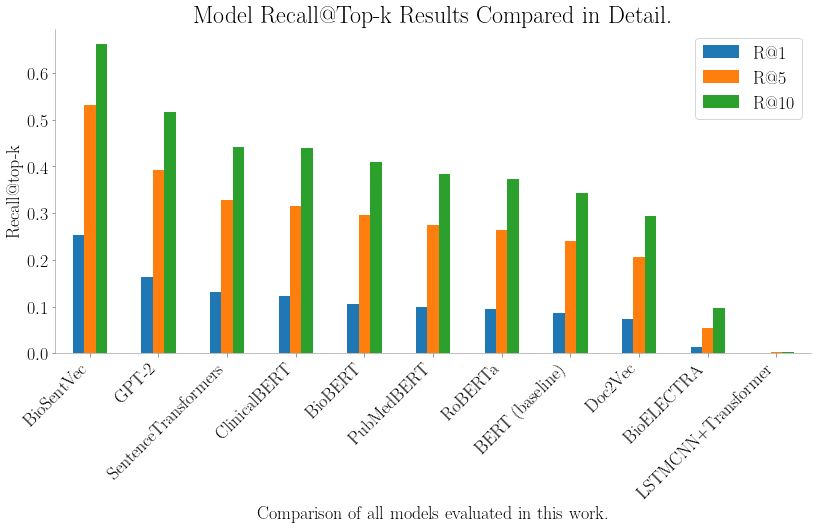

In [56]:
latexify(fig_width=12, fig_height=8, font_size=28, label_size=18, title_size=24, legend_size=18)
ax = df.plot(kind='bar', figsize=(12,8))
plt.xticks(np.arange(len(df.model)), list(df.model), rotation=45, ha='right');
# ax.get_legend().remove()
ax.set_xlabel("Comparison of all models evaluated in this work.")
ax.set_ylabel("Recall@top-k")
ax.set_title("Model Recall@Top-k Results Compared in Detail.")
plt.tight_layout()
format_axes(ax)
plt.savefig("plots/models_topk_compared.pdf")

In [57]:
# correlation different models alignment
# wandb_export_2022-08-20T11_30_22.482+02_00.csv

In [58]:
df = pd.read_csv('wandb_export/wandb_export_2022-08-20T11_30_22.482+02_00.csv')

df.drop(columns=['_wandb'], inplace=True)
df.columns = ['name', 'val/events_to_notes_R@10', 'val/notes_to_events_R@10']

# remove first record from data
df.drop(df[df.name == 'charmed-paper-293'].index, inplace=True)

In [59]:
df

,name,val/events_to_notes_R@10,val/notes_to_events_R@10
1,BioSentVec,0.654615,0.668173
2,Sent2Vec default,0.654615,0.665557
3,dainty-bee-313,0.657469,0.662464
4,Sent2Vec new model,0.651284,0.659372
5,SentVec (full),0.645814,0.659372
...,...,...,...
64,BERT (full),0.055423,0.043530
65,BioBERT (full),0.039486,0.037583
66,BERT Ablation Study: Notes,0.036870,0.033539
67,LSTMCNN+Transformer,0.004069,0.002486


[-0.00459994]
[[1.02423642]]
0.9976367271738322


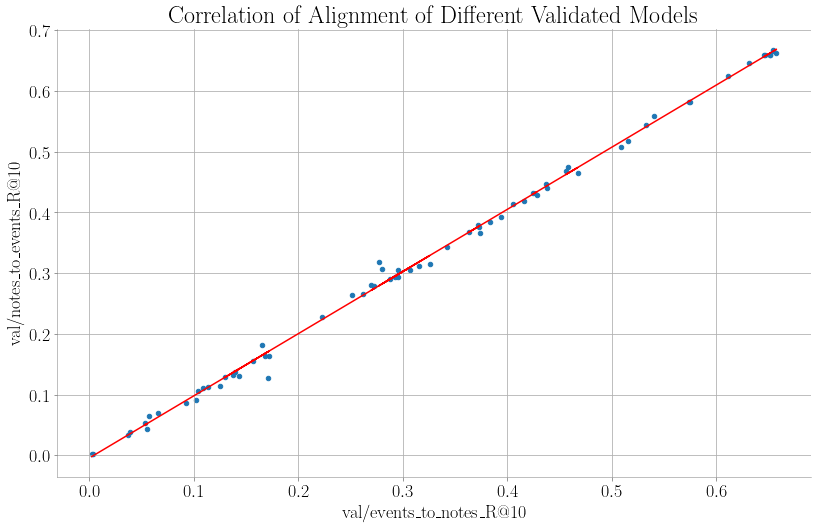

In [60]:
from sklearn.linear_model import LinearRegression
x = df['val/events_to_notes_R@10'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
y = df['val/notes_to_events_R@10'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
model = linear_regressor.fit(x, y)
y_pred = model.predict(x)

#plt.scatter(X, Y)
ax = df.plot.scatter(x='val/events_to_notes_R@10', y='val/notes_to_events_R@10')
plt.plot(x, y_pred, color='red')
#ax.set_xlabel("Recall at top-k results of all evaluated models, where $k \in \{1,5,10\}.$")
#ax.set_ylabel("Recall@top-k")
ax.set_title("Correlation of Alignment of Different Validated Models")
plt.tight_layout()
plt.grid()
format_axes(ax)
plt.savefig("plots/correlation_models.pdf")
# plt.show()

print(linear_regressor.intercept_)
print(linear_regressor.coef_)
print(model.score(x, y))

In [61]:
df.describe

<bound method NDFrame.describe of                           name  val/events_to_notes_R@10  \
1                   BioSentVec                  0.654615   
2             Sent2Vec default                  0.654615   
3               dainty-bee-313                  0.657469   
4           Sent2Vec new model                  0.651284   
5               SentVec (full)                  0.645814   
..                         ...                       ...   
64                 BERT (full)                  0.055423   
65              BioBERT (full)                  0.039486   
66  BERT Ablation Study: Notes                  0.036870   
67         LSTMCNN+Transformer                  0.004069   
68                GPT-2 CLOOB1                  0.002379   

    val/notes_to_events_R@10  
1                   0.668173  
2                   0.665557  
3                   0.662464  
4                   0.659372  
5                   0.659372  
..                       ...  
64                  0.043530

In [62]:
# wandb_export_2022-08-20T12_30_18.275+02_00.csv
# comparison ablation studies


In [63]:
df = pd.read_csv('wandb_export/wandb_export_2022-08-20T12_38_40.685+02_00.csv')

df.drop(columns=['id'], inplace=True)
df.columns = ['model', 'val/events_to_notes_R@10', 'val/notes_to_events_R@10']

# remove atributes
#df['model'] = df['model'].str.split(pat='_', n=1, expand=False).str[0]
#df['model'] = df['model'].str.split(pat=' ', n=1, expand=False).str[0]

# replace wrong values with the correct ones
df.loc[df['model'] == 'SentenceTransformer', 'model'] = 'SentenceTransformers'
df.loc[df['model'] == 'CliBERT', 'model'] = 'ClinicalBERT'

df_base = df.copy()
df_abl = df.copy()

# remove first record from data
df_base.drop(df_base[df_base.model.str.contains("Ablation")].index, inplace=True)
df_base.drop(df_base[(df_base.model.str.contains("baseline")==False) & (df_base.model.str.contains("BioSentVec")==False)].index, inplace=True)
#df_base.drop(df_base[df_base.model.str.contains("BioSentVec")==False].index, inplace=True)
df_abl.drop(df_abl[df_abl.model.str.contains("Ablation")==False].index, inplace=True)
df_abl_nochart = df_abl.copy()
df_abl_chart = df_abl.copy()

df_abl_chart.drop(df_abl_chart[df_abl_chart.model.str.contains("no chart")].index, inplace=True)
df_abl_nochart.drop(df_abl_nochart[df_abl_nochart.model.str.contains("no chart")==False].index, inplace=True)

In [64]:
df_base

,model,val/events_to_notes_R@10,val/notes_to_events_R@10
0,BioSentVec,0.654615,0.668173
9,BERT (baseline),0.341817,0.342769


In [65]:
df_abl

,model,val/events_to_notes_R@10,val/notes_to_events_R@10
1,BioSentVec Ablation: chart events & discharge ...,0.540676,0.559467
5,"BioSentVec Ablation: no chart events, non-disc...",0.415794,0.418173
11,BERT Ablation: chart events & discharge notes,0.288059,0.290438
12,"BERT Ablation: no chart events, non-discharge ...",0.129638,0.128211


In [66]:
df_abl_chart

,model,val/events_to_notes_R@10,val/notes_to_events_R@10
1,BioSentVec Ablation: chart events & discharge ...,0.540676,0.559467
11,BERT Ablation: chart events & discharge notes,0.288059,0.290438


[-0.00459994]
[[1.02423642]]
0.9976367271738322


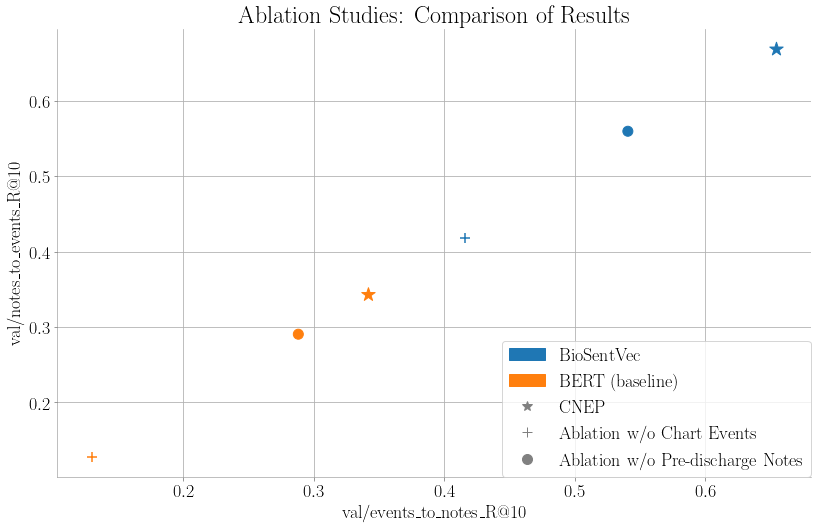

In [67]:
import matplotlib.lines as mlines

# from sklearn.linear_model import LinearRegression
# x = df['val/events_to_notes_R@10'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
# y = df['val/notes_to_events_R@10'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
# linear_regressor = LinearRegression()
# model = linear_regressor.fit(x, y)
# y_pred = model.predict(x)

marker_orig = mlines.Line2D([], [], color='gray', marker='*', linestyle='None',
                          markersize=10, label='CNEP')
marker_dot = mlines.Line2D([], [], color='gray', marker='+', linestyle='None',
                          markersize=10, label='Ablation w/o Chart Events')
marker_plus = mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                          markersize=10, label='Ablation w/o Pre-discharge Notes')


#plt.scatter(X, Y)
colors=['C0', 'C1']
ax = df_base.plot.scatter(x='val/events_to_notes_R@10', y='val/notes_to_events_R@10', s=200, marker='*', color=colors)
df_abl_nochart.plot.scatter(ax=ax,x='val/events_to_notes_R@10', y='val/notes_to_events_R@10',s=100, marker='+', color=colors)
df_abl_chart.plot.scatter(ax=ax,x='val/events_to_notes_R@10', y='val/notes_to_events_R@10',s=100, marker='o', color=colors)
#plt.plot(x, y_pred, color='red')
#ax.set_xlabel("Recall at top-k results of all evaluated models, where $k \in \{1,5,10\}.$")
#ax.set_ylabel("Recall@top-k")
ax.set_title("Ablation Studies: Comparison of Results")

cmap = dict(zip(df_base.model, colors))
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
#plt.legend(handles=patches, bbox_to_anchor=(0.6, 0.8), loc='center left', borderaxespad=0)
plt.legend(handles=patches + [marker_orig, marker_dot, marker_plus], loc='lower right', borderaxespad=0)
#plt.legend()
plt.tight_layout()
plt.grid()

format_axes(ax)
plt.savefig("plots/ablation_studies.pdf")
# plt.show()

print(linear_regressor.intercept_)
print(linear_regressor.coef_)
print(model.score(x, y))